# Project_20 - Pytorch Image Classification (FashionMNIST)

## Project Description
1. Download the FashionMNIST dataset from torchvision.datasets
2. Train a torch.nn model to classify the images
3. Visualize the classification result

In [1]:
# import necessary packages
import torch
from torch.utils.data import DataLoader
from torch import nn, optim
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay

In [2]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
train_data = datasets.FashionMNIST(
            root='dataset',
            download=True,
            train=True,
            transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
            root='dataset',
            download=True,
            train=False,
            transform=transforms.ToTensor()
)

100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:18<00:00, 1418355.84it/s]


Extracting dataset\FashionMNIST\raw\train-images-idx3-ubyte.gz to dataset\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 142441.14it/s]


Extracting dataset\FashionMNIST\raw\train-labels-idx1-ubyte.gz to dataset\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████| 4422102/4422102 [00:08<00:00, 535784.38it/s]


Extracting dataset\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to dataset\FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<?, ?it/s]

Extracting dataset\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to dataset\FashionMNIST\raw



In [4]:
print(len(train_data), len(test_data))

60000 10000


In [5]:
train_dl = DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True,
)

test_dl = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=True,
)

In [6]:
print(len(train_dl), len(test_dl))
print(next(iter(train_dl))[0].shape)
print(next(iter(train_dl))[1].shape)

1875 313
torch.Size([32, 1, 28, 28])
torch.Size([32])


In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
train_data[0][0].shape

torch.Size([1, 28, 28])

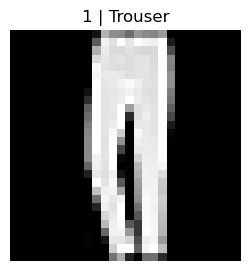

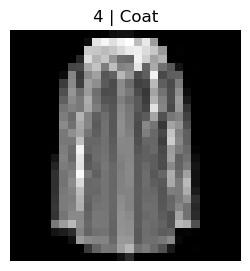

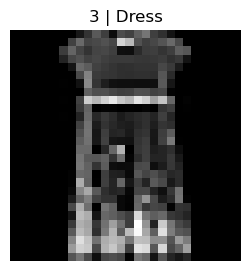

In [9]:
import random
for i in random.sample(range(1, len(train_data)), k=3):
  plt.figure(figsize=(3, 3))
  plt.imshow(train_data[i][0].squeeze(dim=0), cmap='gray')
  title_text = f'{train_data[i][1]} | {class_names[train_data[i][1]]}'
  plt.title(title_text)
  plt.axis(False)
  plt.show()

In [10]:
class FashionMNISTModel_0(nn.Module):
  def __init__(self, input_shape=1, hidden_shape=10, output_shape=10):
    super().__init__()
    self.vision_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding='same'),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.vision_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding='same'),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_shape*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.vision_block_1(x)
    x = self.vision_block_2(x)
    x = self.classifier(x)
    return x

In [11]:
model = FashionMNISTModel_0(1, 10, 10).to(device)
model

FashionMNISTModel_0(
  (vision_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vision_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [12]:
print(train_data[0][0].unsqueeze(dim=0).shape)
y_pred = model(train_data[0][0].unsqueeze(dim=0).to(device))
y_pred

torch.Size([1, 1, 28, 28])


tensor([[ 0.0012,  0.0021,  0.0084,  0.0136,  0.0217, -0.0014, -0.0344,  0.0366,
         -0.0254, -0.0047]], grad_fn=<AddmmBackward0>)

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.001)

In [23]:
epochs = 5
epoch_count = []
train_losses = []
test_losses = []

In [24]:
def train_step(model, dataloader, loss_fn, acc_fn, optimizer):
  model.train()
  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_logits = model(X)
    y_proba = torch.softmax(y_logits, dim=1)
    y_pred = torch.argmax(y_proba, dim=1)

    loss = loss_fn(y_logits, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss += loss
    train_acc += acc_fn(y.cpu(), y_pred.cpu())

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  train_losses.append(train_loss.cpu().detach().numpy())

  print(f'Train_loss: {train_loss:.4f} | Train_acc: {train_acc:.4f}')

def test_step(model, dataloader, loss_fn, acc_fn):
  model.eval()
  with torch.inference_mode():
    test_loss, test_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      y_logits = model(X)
      y_proba = torch.softmax(y_logits, dim=1)
      y_pred = torch.argmax(y_proba, dim=1)

      test_loss += loss_fn(y_logits, y)
      test_acc += acc_fn(y.cpu(), y_pred.cpu())

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    test_losses.append(test_loss.cpu())

    print(f'Test_loss: {test_loss:.4f} | Test_acc: {test_acc:.4f}\n')

In [25]:
from tqdm.auto import tqdm
for epoch in tqdm(range(epochs), desc='Training Progress'):
  print(f"Epoch: {epoch}\n-------------------")
  train_step(model, train_dl, loss_fn, accuracy_score, optimizer)
  test_step(model, test_dl, loss_fn, accuracy_score)
  epoch_count.append(epoch)

Training Progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------------------
Train_loss: 0.2884 | Train_acc: 0.8973
Test_loss: 0.3160 | Test_acc: 0.8867

Epoch: 1
-------------------
Train_loss: 0.2676 | Train_acc: 0.9037
Test_loss: 0.2920 | Test_acc: 0.8942

Epoch: 2
-------------------
Train_loss: 0.2540 | Train_acc: 0.9087
Test_loss: 0.2873 | Test_acc: 0.8979

Epoch: 3
-------------------
Train_loss: 0.2436 | Train_acc: 0.9117
Test_loss: 0.2819 | Test_acc: 0.9018

Epoch: 4
-------------------
Train_loss: 0.2346 | Train_acc: 0.9153
Test_loss: 0.2609 | Test_acc: 0.9058



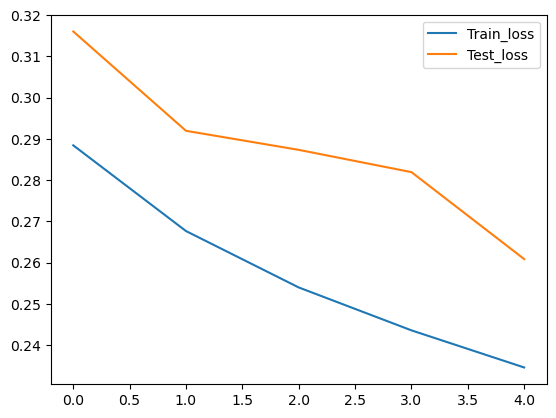

In [26]:
plt.plot(epoch_count, train_losses, label='Train_loss')
plt.plot(epoch_count, test_losses, label='Test_loss')
plt.legend()
plt.show()

In [27]:
model.eval()
with torch.inference_mode():
  y_preds = []
  y_tests = []
  for batch, (X, y) in enumerate(test_dl):
    X, y = X.to(device), y.to(device)

    y_logits = model(X)
    y_proba = torch.softmax(y_logits, dim=1)
    y_pred = torch.argmax(y_proba, dim=1)

    y_preds.append(y_pred)
    y_tests.append(y)

y_preds_list = torch.cat(y_preds, dim=0).cpu()
y_tests_list = torch.cat(y_tests, dim=0).cpu()

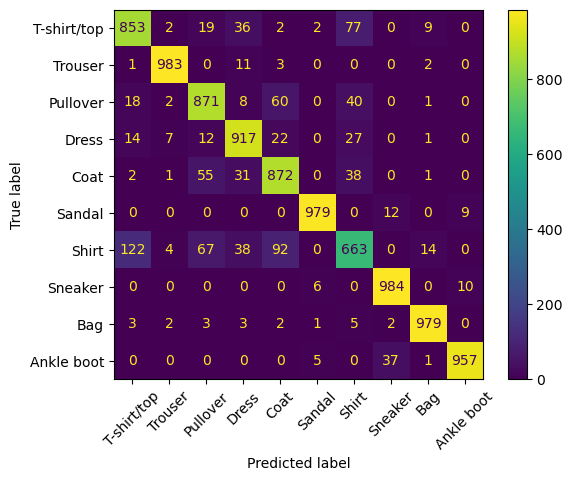

In [28]:
ConfusionMatrixDisplay.from_predictions(y_tests_list, y_preds_list, display_labels=class_names)
plt.xticks(rotation=45)
plt.show()

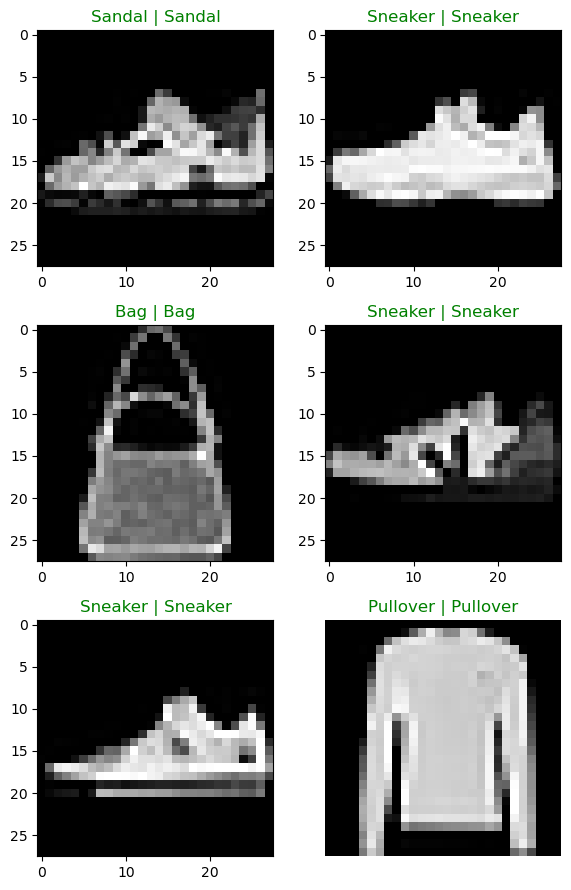

In [29]:
import random
fig, axes = plt.subplots(3, 2, figsize=(6, 9))
for n, i in enumerate(random.sample(range(1, len(test_data)), k=6)):
  test_logits = model(test_data[i][0].unsqueeze(dim=0).to(device))
  test_proba = torch.softmax(test_logits, dim=1)
  test_pred = torch.argmax(test_proba, dim=1)

  true_label = class_names[test_data[i][1]]
  test_label = class_names[test_pred]
  title_text = f'{true_label} | {test_label}'

  row_idx = n // 2
  col_idx = n % 2

  # Plot the image on the corresponding subplot
  axes[row_idx, col_idx].imshow(test_data[i][0].squeeze(dim=0), cmap='gray')
  if true_label == test_label:
      axes[row_idx, col_idx].set_title(title_text, color='g')
  else:
      axes[row_idx, col_idx].set_title(title_text, color='r')
  plt.axis(False)
  plt.tight_layout()